<a href="https://colab.research.google.com/github/Boliang312/Deep-Learning/blob/main/HW3_Chen_Boliang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Assuming df is your dataset
df = pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
data = df.filter(['Close'])
data

,Close
0,51.830002
1,52.431999
2,53.130001
3,52.627998
4,53.335999
...,...
1254,241.731995
1255,274.316010
1256,277.971985
1257,273.175995


In [24]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step):
    x_data, y_data = [], []
    for i in range(time_step, len(dataset)):
        x_data.append(dataset[i-time_step:i, 0])
        y_data.append(dataset[i, 0])
    return np.array(x_data), np.array(y_data)

In [25]:
def build_and_train_model(input_data, output_data, layers, batch_size, epochs=1):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(input_data.shape[1], 1)))
    for i in range(layers - 2):  # Adjusting for input and final dense layer
        model.add(LSTM(64, return_sequences=True if i != layers - 3 else False))  # Ensure the last LSTM layer doesn't return sequences
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(input_data, output_data, batch_size=batch_size, epochs=epochs)
    return model

In [26]:
# Define a function to visualize predictions
def visualize_predictions(train_data, valid_data, title):
    plt.figure(figsize=(16, 6))
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train_data['Date'], train_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Predictions'])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

In [38]:
# Create training datasets with different time lags
# Make comparetion with layer and batch size
time_steps = [1, 7, 14]
layer_options = [4, 6]
batch_sizes = [1, 32]

2/2 [==============================] - 1s 7ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


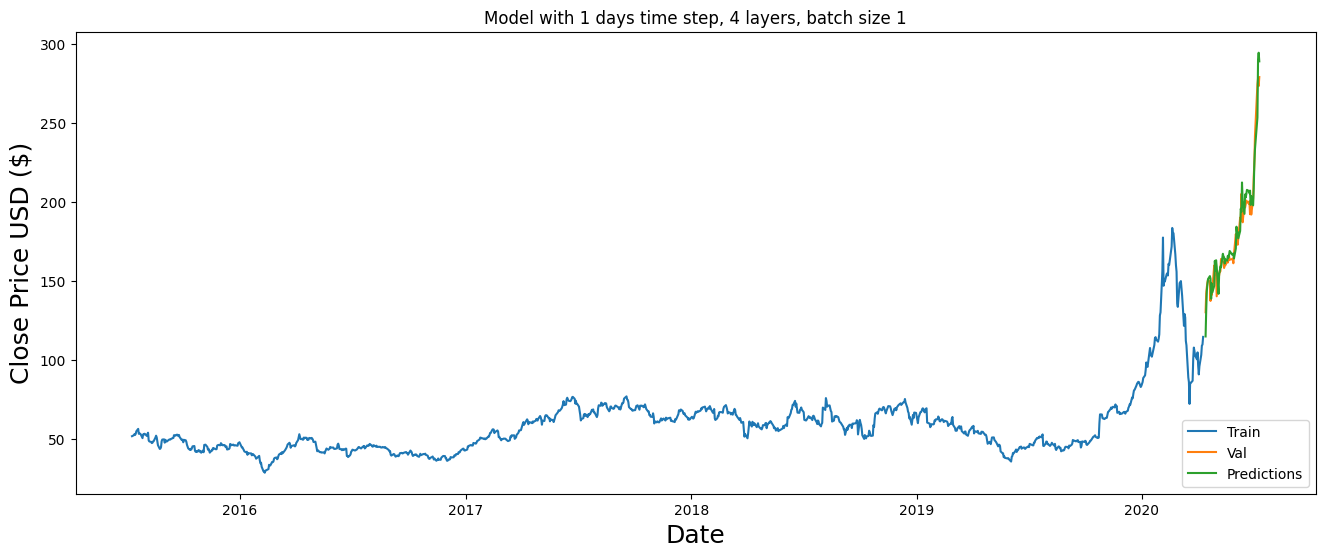

2/2 [==============================] - 1s 9ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


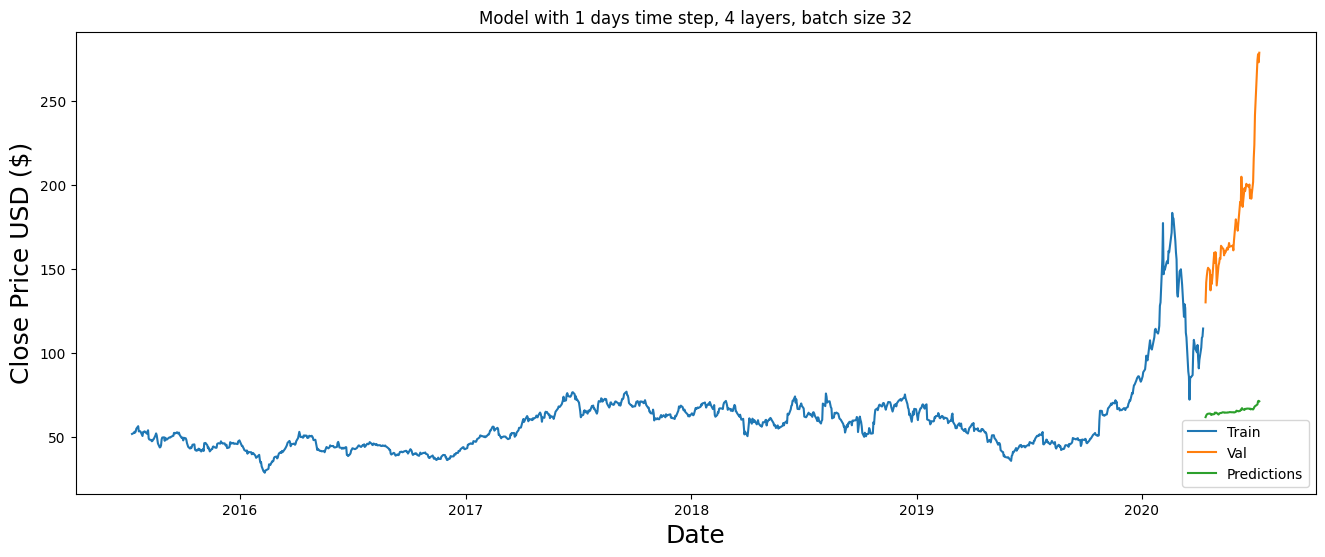

2/2 [==============================] - 1s 9ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


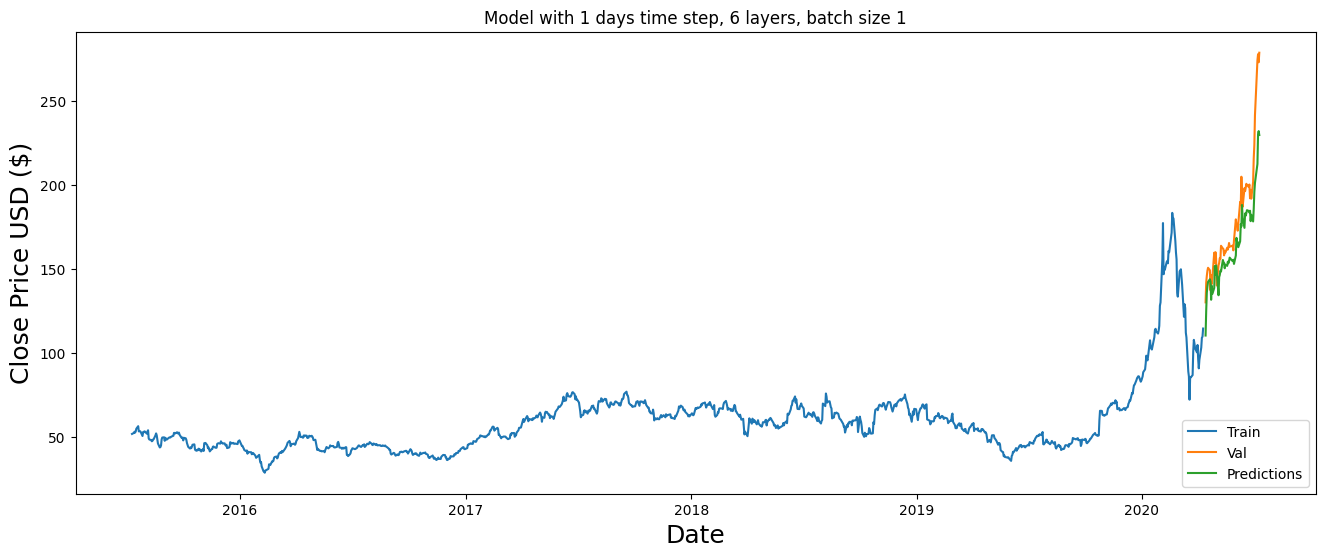

2/2 [==============================] - 1s 9ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


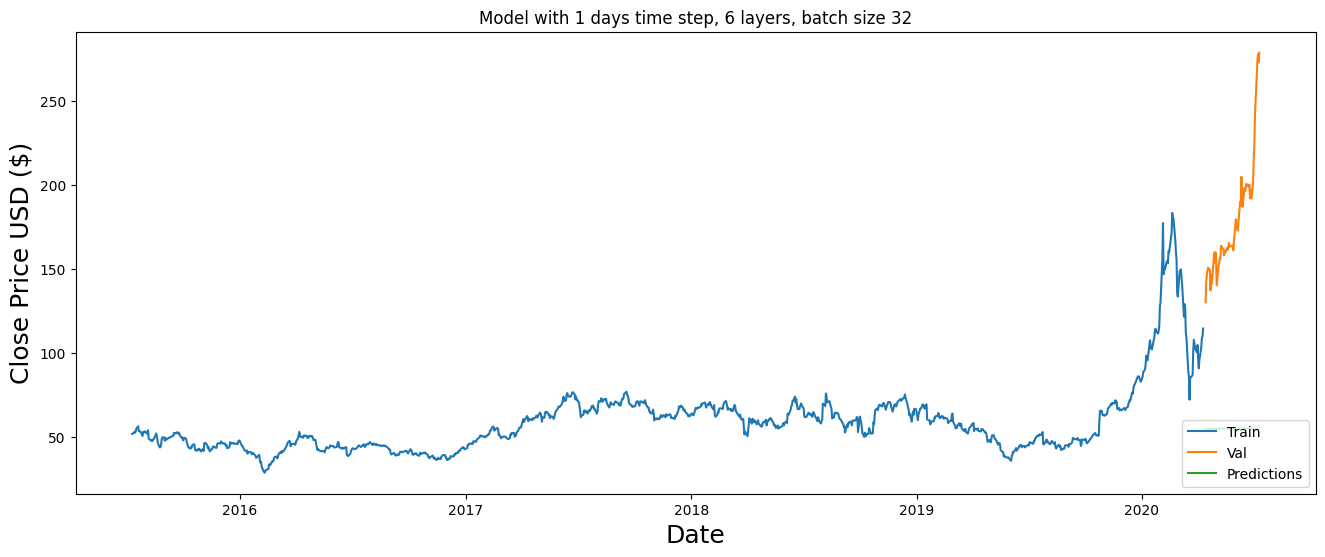

2/2 [==============================] - 1s 10ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


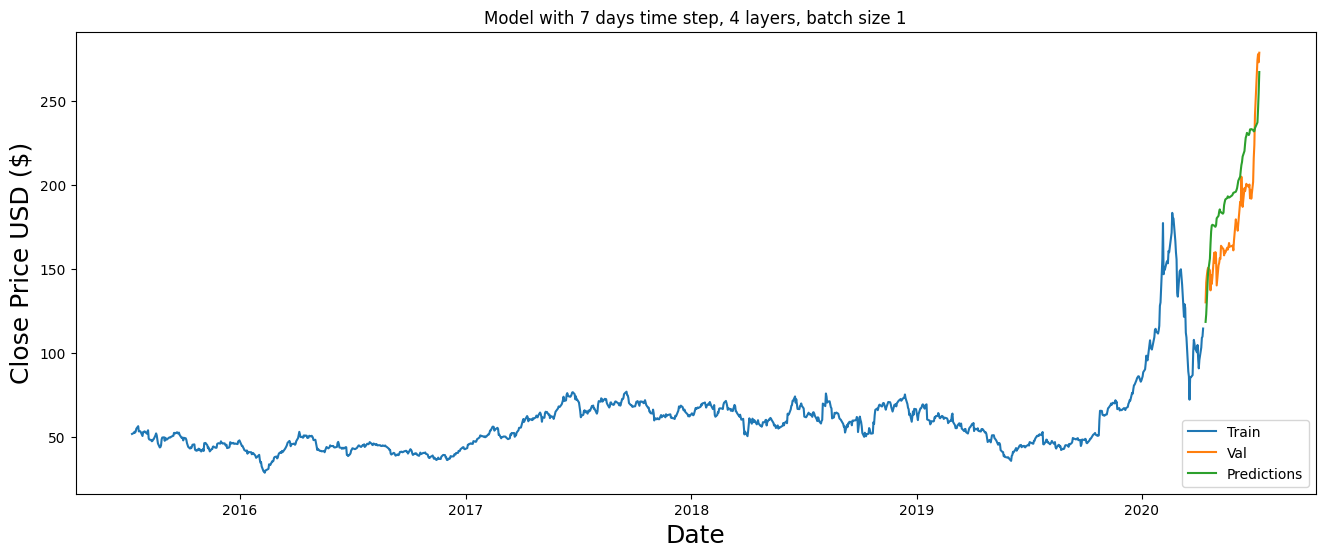

2/2 [==============================] - 1s 12ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


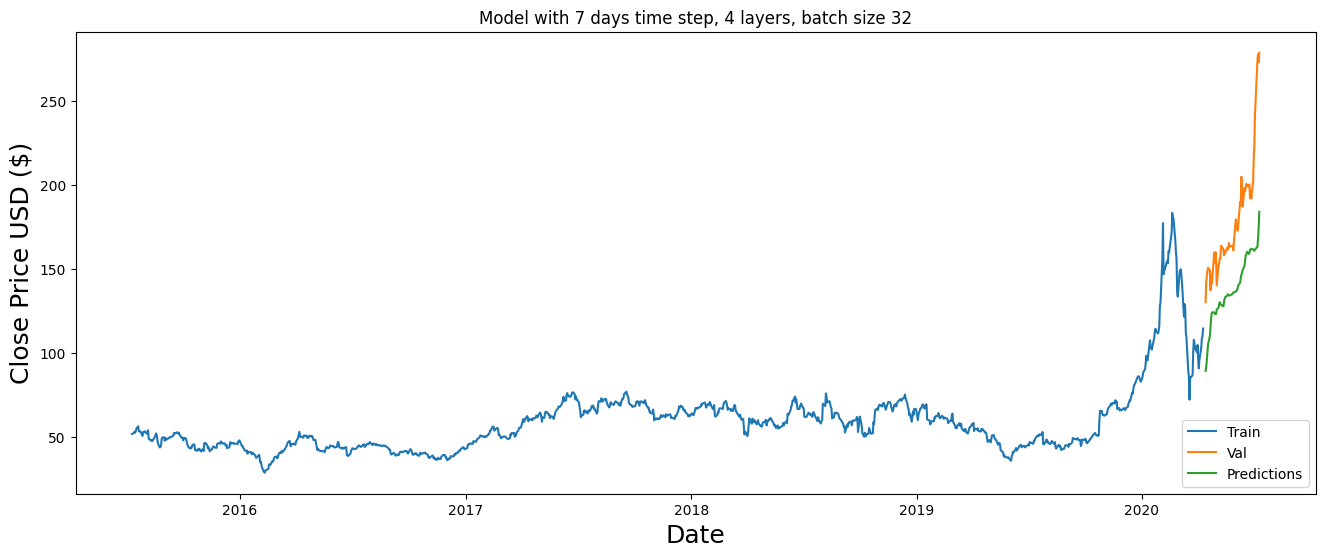

2/2 [==============================] - 1s 14ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


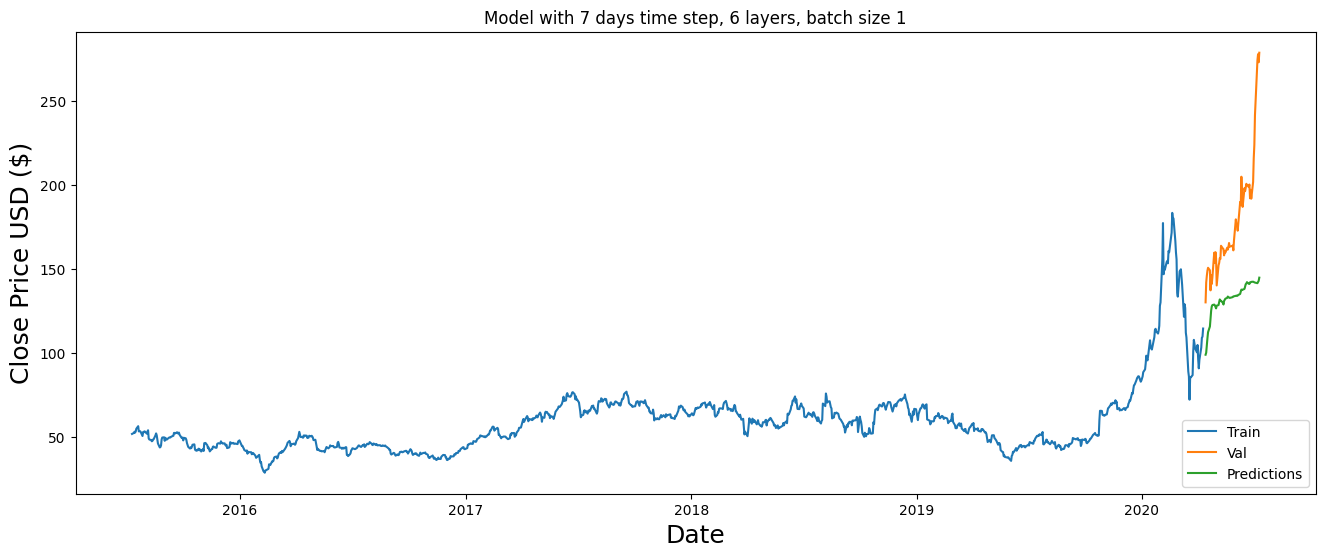

2/2 [==============================] - 1s 13ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


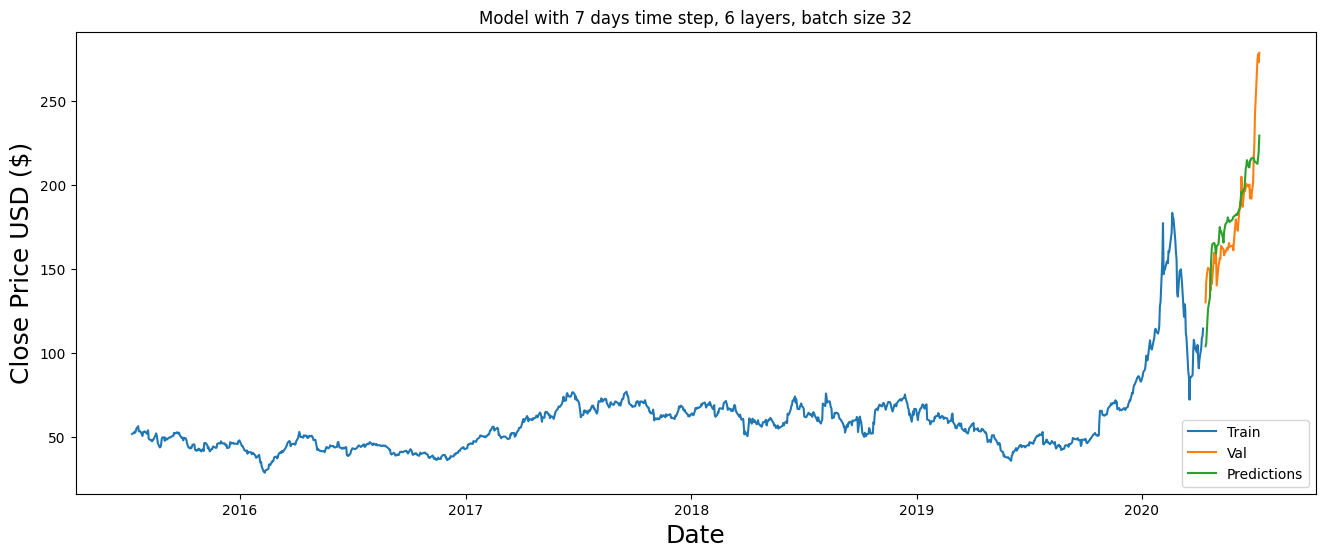

2/2 [==============================] - 1s 17ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


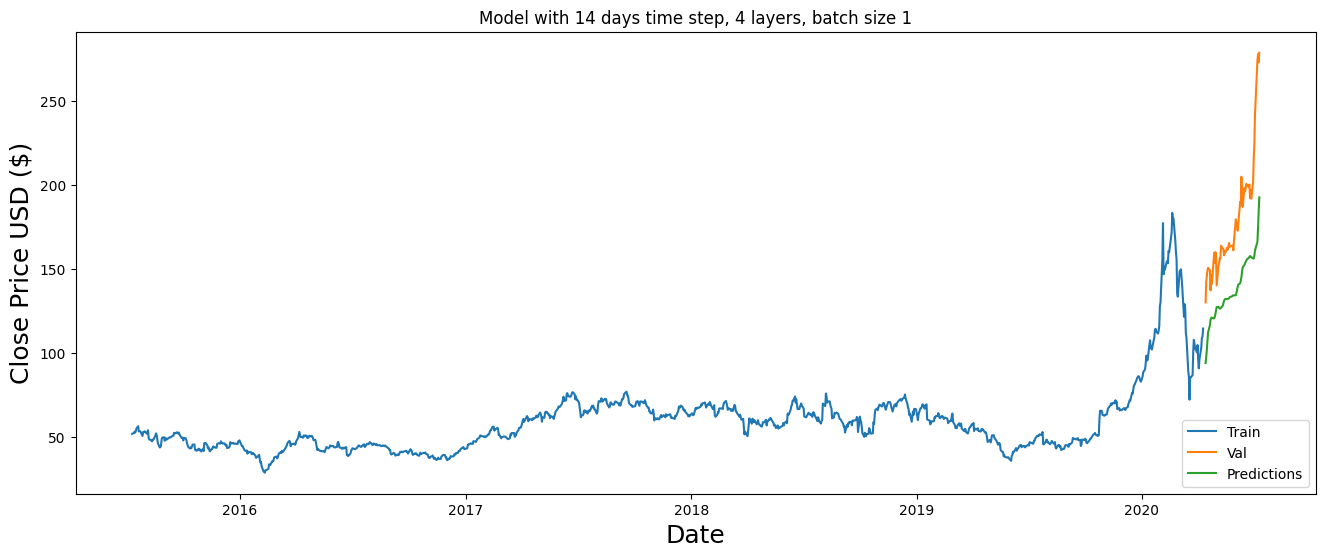

2/2 [==============================] - 1s 12ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


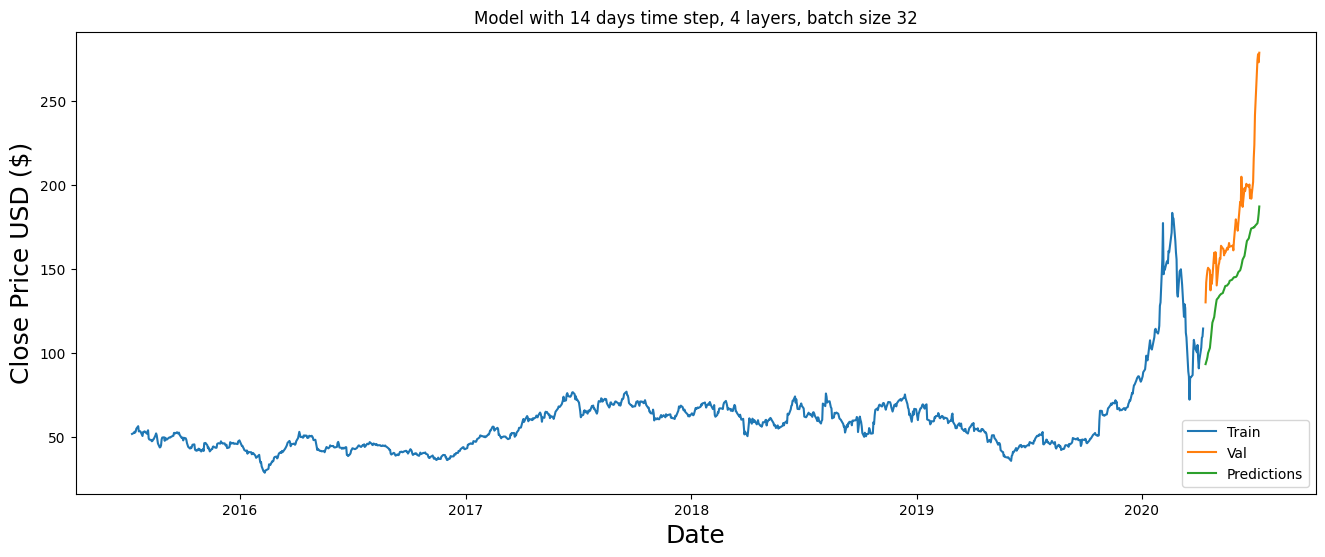

2/2 [==============================] - 1s 12ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


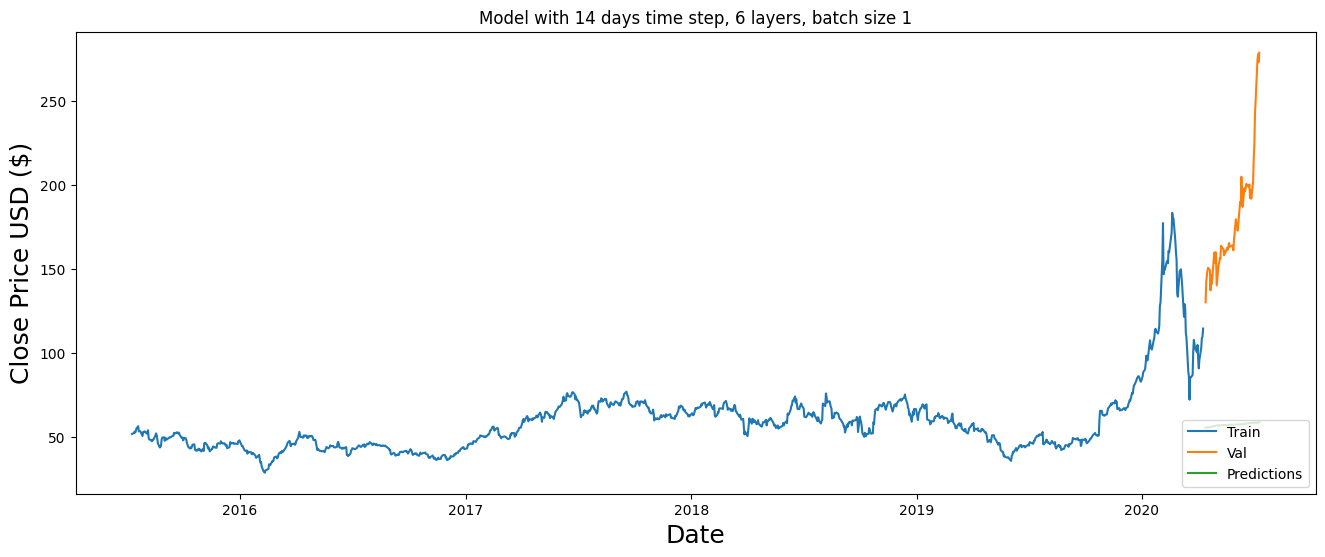

2/2 [==============================] - 1s 11ms/step


<ipython-input-39-68d86148f762>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


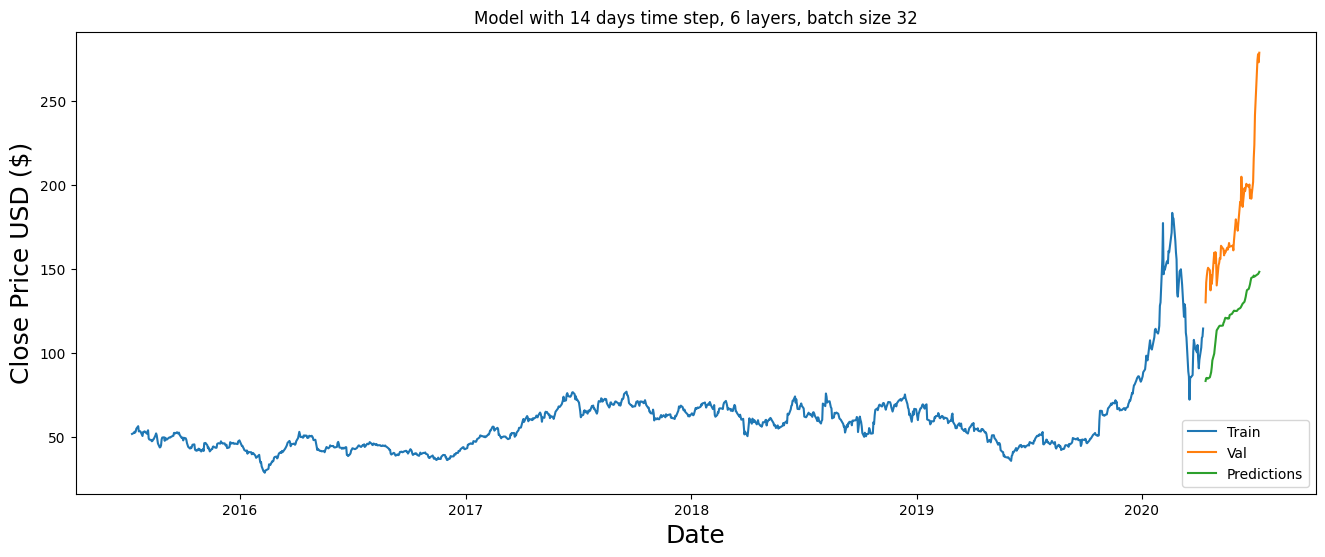

In [39]:
for step in time_steps:
    for layers in layer_options:
        for batch in batch_sizes:
            # Splitting the dataset into train and test
            training_data_len = int(np.ceil(len(scaled_data) * 0.95))
            train_data = scaled_data[0:training_data_len, :]

            # Creating the datasets
            x_train, y_train = create_dataset(train_data, step)
            x_test, y_test = create_dataset(scaled_data[training_data_len-step:], step)

            # Reshape the data
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            # Build and train the model
            model = build_and_train_model(x_train, y_train, layers, batch, epochs=1)

            # Generate predictions
            predictions = model.predict(x_test)
            predictions = scaler.inverse_transform(predictions)

            train = df[:training_data_len]
            valid = df[training_data_len:]
            valid['Predictions'] = predictions

            # Visualize the results
            visualize_predictions(train, valid, f"Model with {step} days time step, {layers} layers, batch size {batch}")



In [ ]:
#From the picture, we can see the model with 1day, 4 layers, 1 batch size is the best model.
#So we choose this one to do the future prediction.

1/1 [==============================] - 4s 4s/step


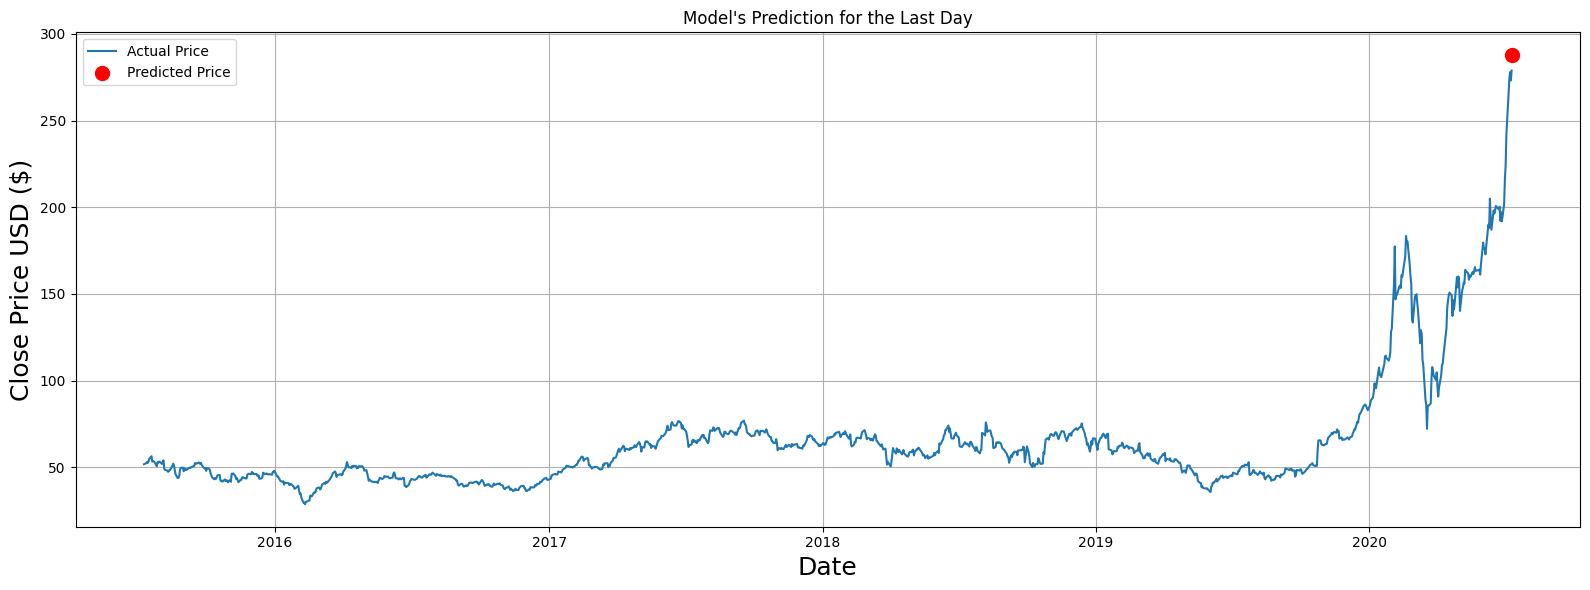

In [63]:
# Prepare the data for training with entire dataset except the last day
time_step = 1  # 1 day time step
layers = 4  # 4 layers
batch = 1  # batch size of 1

training_data_len = len(scaled_data) - 1  # Exclude the last day
train_data = scaled_data[0:training_data_len, :]

# Create datasets using the time_step
x_train, y_train = create_dataset(train_data, time_step)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model with specified parameters
model = build_and_train_model(x_train, y_train, layers, batch, epochs=1)

# Prepare the data for predicting the last day's price
last_day_data = scaled_data[-time_step-1:-1].reshape(1, time_step, 1)

# Predict the last day's price
predicted_price = model.predict(last_day_data)
predicted_price = scaler.inverse_transform(predicted_price)

# Visualize the real stock prices and the predicted price for the last day
def visualize_last_day_prediction(actual_data, predicted_price):
    plt.figure(figsize=(16, 6))
    plt.title("Model's Prediction for the Last Day")
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(actual_data['Date'], actual_data['Close'])

    # Highlight the predicted price for the last day
    plt.scatter(actual_data['Date'].iloc[-1], predicted_price, color='red', label='Predicted Price', s=100, zorder=5)

    plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Use the function to visualize the result
visualize_last_day_prediction(df, predicted_price[0][0])

1/1 [==============================] - 1s 872ms/step


<ipython-input-52-2a75d0dd7b73>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


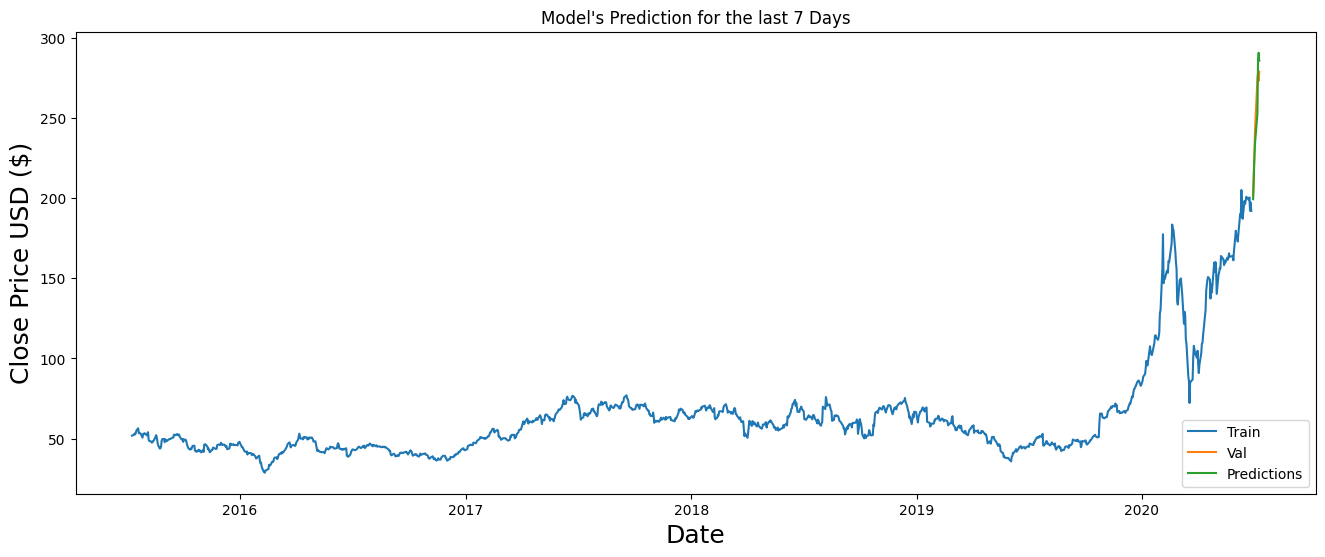

In [52]:
# Prepare the data for training with entire dataset except the last day
time_step = 1  # 1 day time step
layers = 4  # 4 layers
batch = 1  # batch size of 1

# Use all data except the last 8 days to train
training_data_len = len(scaled_data) - 8
train_data = scaled_data[0:training_data_len, :]

# Create the datasets
x_train, y_train = create_dataset(train_data, 1) # Using a 1-day lag

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = build_and_train_model(x_train, y_train, 4, 1, epochs=1)

# Use the last 8 days of the scaled data for prediction (1 day for input + 7 days for prediction)
x_test = scaled_data[training_data_len-1:-1, :]

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = df[:training_data_len]
valid = df[training_data_len:]
valid.reset_index(drop=True, inplace=True)
valid['Predictions'] = predictions

def visualize_predictions(train_data, valid_data, title):
    plt.figure(figsize=(16, 6))
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train_data['Date'], train_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Predictions'])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

# Visualize the results
visualize_predictions(train, valid, "Model's Prediction for the last 7 Days")

1/1 [==============================] - 1s 1s/step


<ipython-input-56-331b40a82e75>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


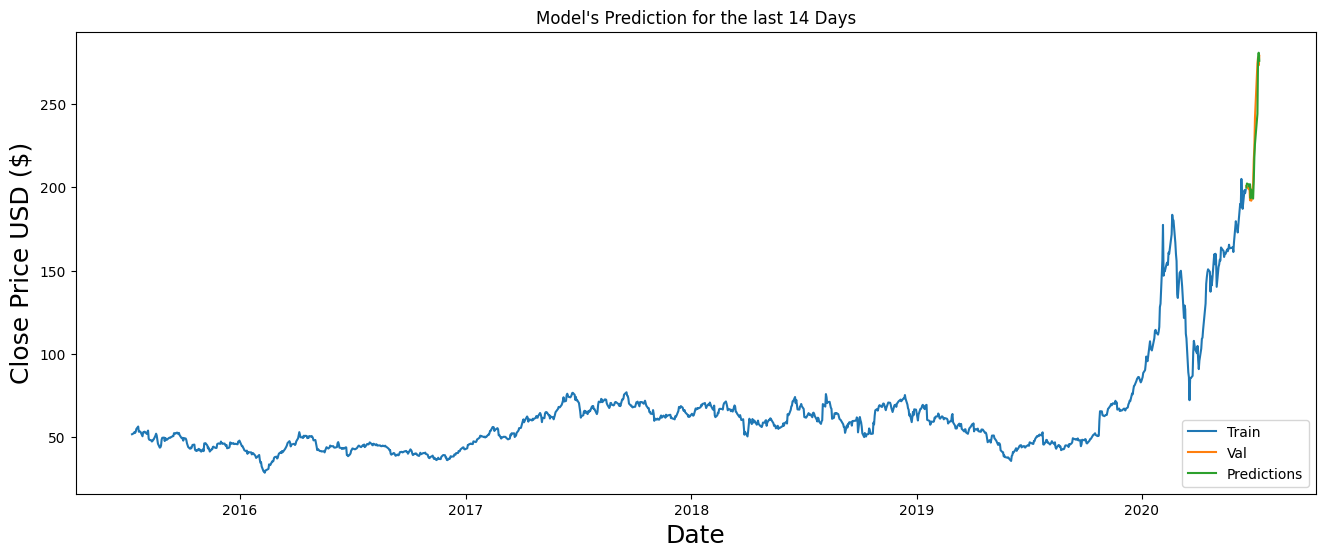

In [56]:
# Prepare the data for training with entire dataset except the last day
time_step = 1  # 1 day time step
layers = 4  # 4 layers
batch = 1  # batch size of 1

# Use all data except the last 8 days to train
training_data_len = len(scaled_data) - 15
train_data = scaled_data[0:training_data_len, :]

# Create the datasets
x_train, y_train = create_dataset(train_data, 1) # Using a 1-day lag

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = build_and_train_model(x_train, y_train, 4, 1, epochs=1)

# Use the last 8 days of the scaled data for prediction (1 day for input + 7 days for prediction)
x_test = scaled_data[training_data_len-1:-1, :]

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = df[:training_data_len]
valid = df[training_data_len:]
valid.reset_index(drop=True, inplace=True)
valid['Predictions'] = predictions

def visualize_predictions(train_data, valid_data, title):
    plt.figure(figsize=(16, 6))
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train_data['Date'], train_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Close'])
    plt.plot(valid_data['Date'], valid_data['Predictions'])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

# Visualize the results
visualize_predictions(train, valid, "Model's Prediction for the last 14 Days")